# BASEBALL CASE STUDY

**PROBLEM STATEMENT:**   
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

I**Input features:** Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors  
  

**Output:** Number of predicted wins (W)

### IMPORTING LIBRARIES

In [283]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

### LOADING DATA

In [284]:
#Loaded .csv file and converted to dataframe.
df=pd.read_csv("baseball.csv")
df=pd.DataFrame(data=df)
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [285]:
#Renaming headers for a better understanding to know what we are analysing.
df.columns=['Number of predicted wins (W)','Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'Walks by batters', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs', 'Earned Run Average (ERA)', 'Complete Games','Shutouts', 'Saves','Errors'] 
df.head()

,Number of predicted wins (W),Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks by batters,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [286]:
df.shape

(30, 17)

In [287]:
#Statistical info of the data.
df.describe().T

# Assuming no null values in data as count is constant.

,count,mean,std,min,25%,50%,75%,max
Number of predicted wins (W),30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
Runs,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
At Bats,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
Hits,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
Doubles,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
Triples,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
Homeruns,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
Walks by batters,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
Strikeouts,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
Stolen Bases,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


**FOR THOSE WHO DONT KNOW HOW GAME WORKS, A SMALL DESCRIPTION ABOUT THE GAME I READ ONLINE.** 
Baseball is played between two teams of nine players each. These two teams take turns batting and fielding. The batting team attempts to score runs by taking turns batting a ball that is thrown by the pitcher of the fielding team, then running counter-clockwise around a series of four bases: first, second, third, and home plate. The fielding team tries to prevent runs by getting hitters or base runners out in any of several ways and a run (R) is scored when a player advances around the bases and returns to home plate. A player on the batting team who reaches base safely will attempt to advance to subsequent bases during teammates’ turns batting, such as on a hit (H), stolen base (SB), or by other means.  
  
The teams switch between batting and fielding whenever the fielding team records three outs. One turn batting for both teams, beginning with the visiting team, constitutes an inning. A game is composed of nine innings, and the team with the greater number of runs at the end of the game wins. Baseball has no game clock and although most games end in the ninth inning, if a game is tied after nine innings it goes into extra innings and will continue indefinitely until one team has a lead at the end of an extra inning.

In [288]:
#Datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Number of predicted wins (W)  30 non-null     int64  
 1   Runs                          30 non-null     int64  
 2   At Bats                       30 non-null     int64  
 3   Hits                          30 non-null     int64  
 4   Doubles                       30 non-null     int64  
 5   Triples                       30 non-null     int64  
 6   Homeruns                      30 non-null     int64  
 7   Walks by batters              30 non-null     int64  
 8   Strikeouts                    30 non-null     int64  
 9   Stolen Bases                  30 non-null     int64  
 10  Runs Allowed                  30 non-null     int64  
 11  Earned Runs                   30 non-null     int64  
 12  Earned Run Average (ERA)      30 non-null     float64
 13  Complet

### EDA (Exploratory Data Analysis)

In [289]:
# Checking for null values.
df.isnull().sum()
# Our data isn't contain any missing values or null values.

Number of predicted wins (W)    0
Runs                            0
At Bats                         0
Hits                            0
Doubles                         0
Triples                         0
Homeruns                        0
Walks by batters                0
Strikeouts                      0
Stolen Bases                    0
Runs Allowed                    0
Earned Runs                     0
Earned Run Average (ERA)        0
Complete Games                  0
Shutouts                        0
Saves                           0
Errors                          0
dtype: int64

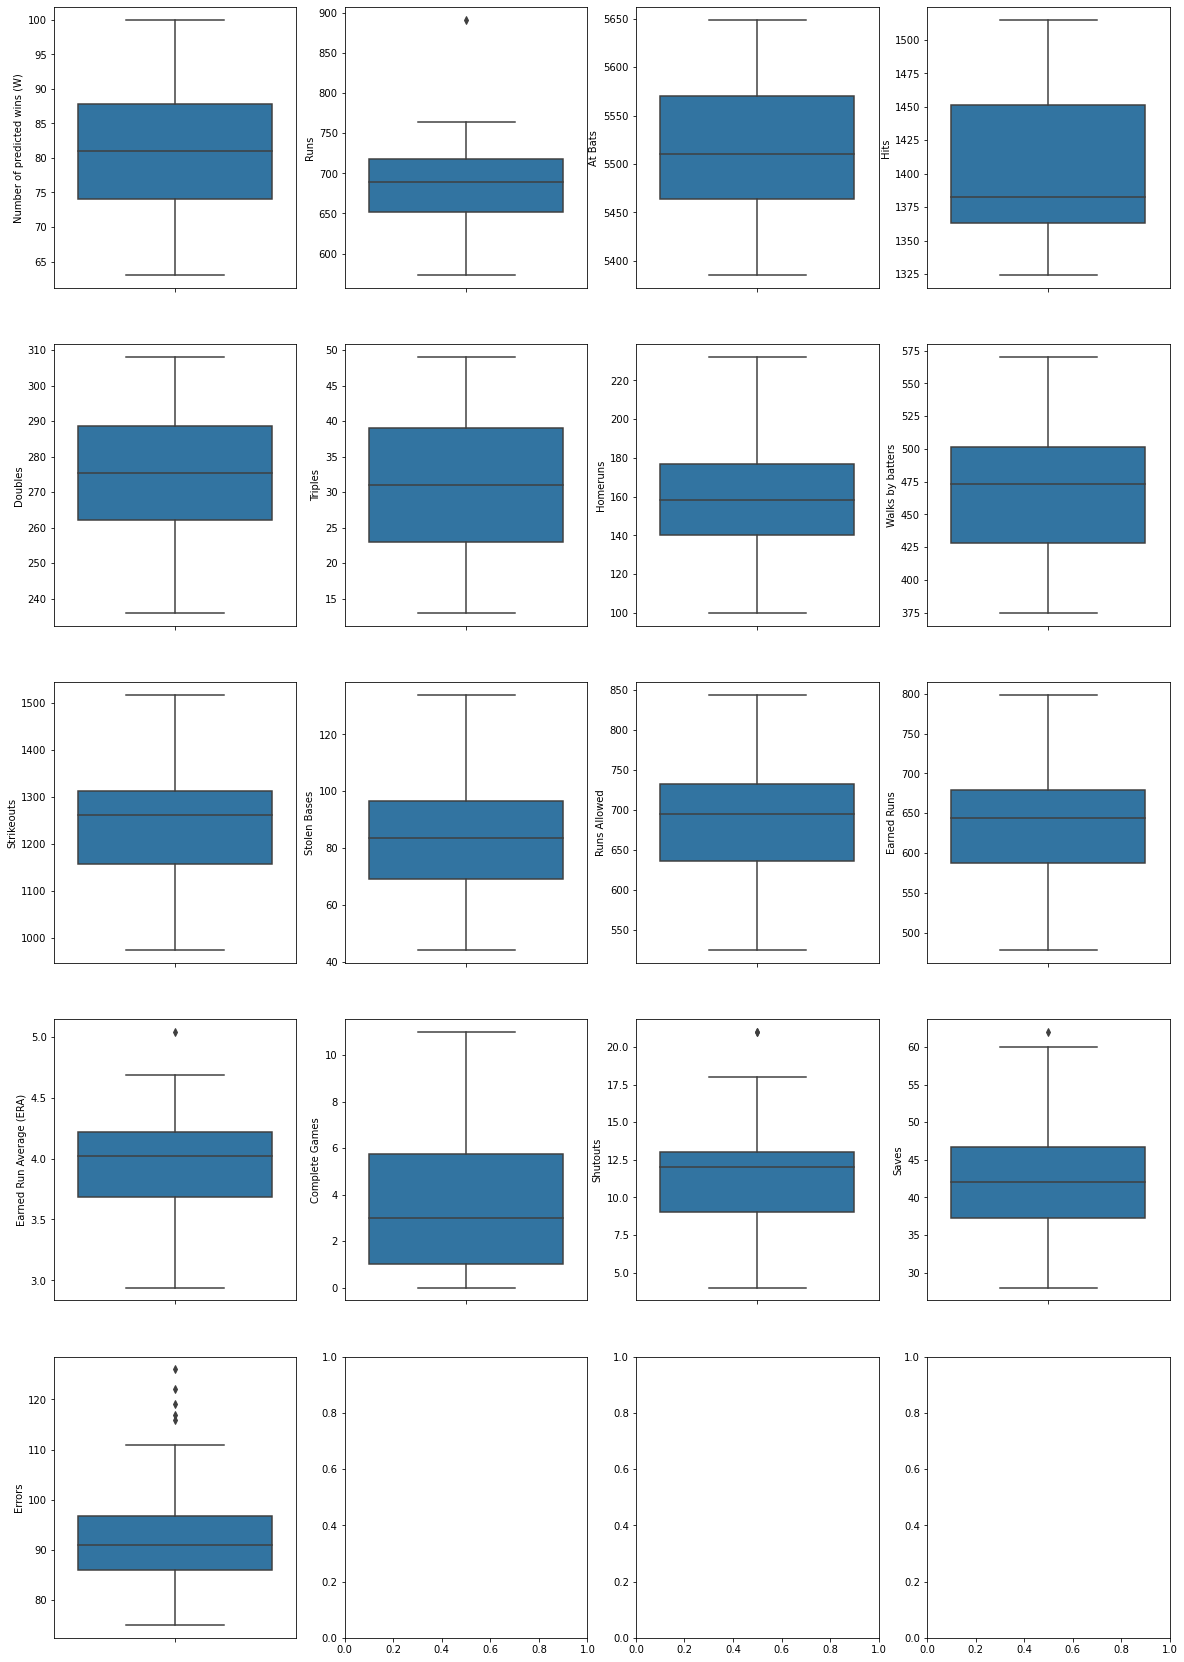

In [290]:
# Checking outliers with boxplot.
fig,ax= plt.subplots(ncols=4,nrows=5,figsize=(20,30))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.boxplot(y=col , data=df, ax=ax[index])
        index+=1

We can observe outliers in  
1.Runs  
2.Earned Run Average(ERA)  
3.Shoutouts  
4. Saves  
5.Errors

In [291]:
# According to basic defnition of IQR outliers, value< Q1-1.5IQR and values > Q1+1.5IQR are reated as outliers.

# calculate interquartile range
q25 = df.quantile(.25)
q75 = df.quantile(.75)
iqr = q75 - q25

#calculate outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
#outliers_removed = [x for x in df if x > lower and x < upper]

# Most of the values are false where some values showing True are the outlier values. 

### VISUALIZATION

<AxesSubplot:xlabel='Number of predicted wins (W)', ylabel='Density'>

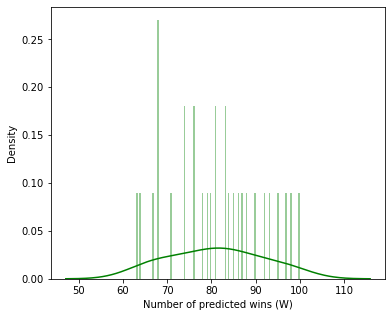

In [292]:
# Lets plot the distribution of target variable No.of Predicted Wins (W).
plt.figure(figsize=(6, 5))
sns.distplot(df['Number of predicted wins (W)'], color='g', bins=100, hist_kws={'alpha': 0.4})

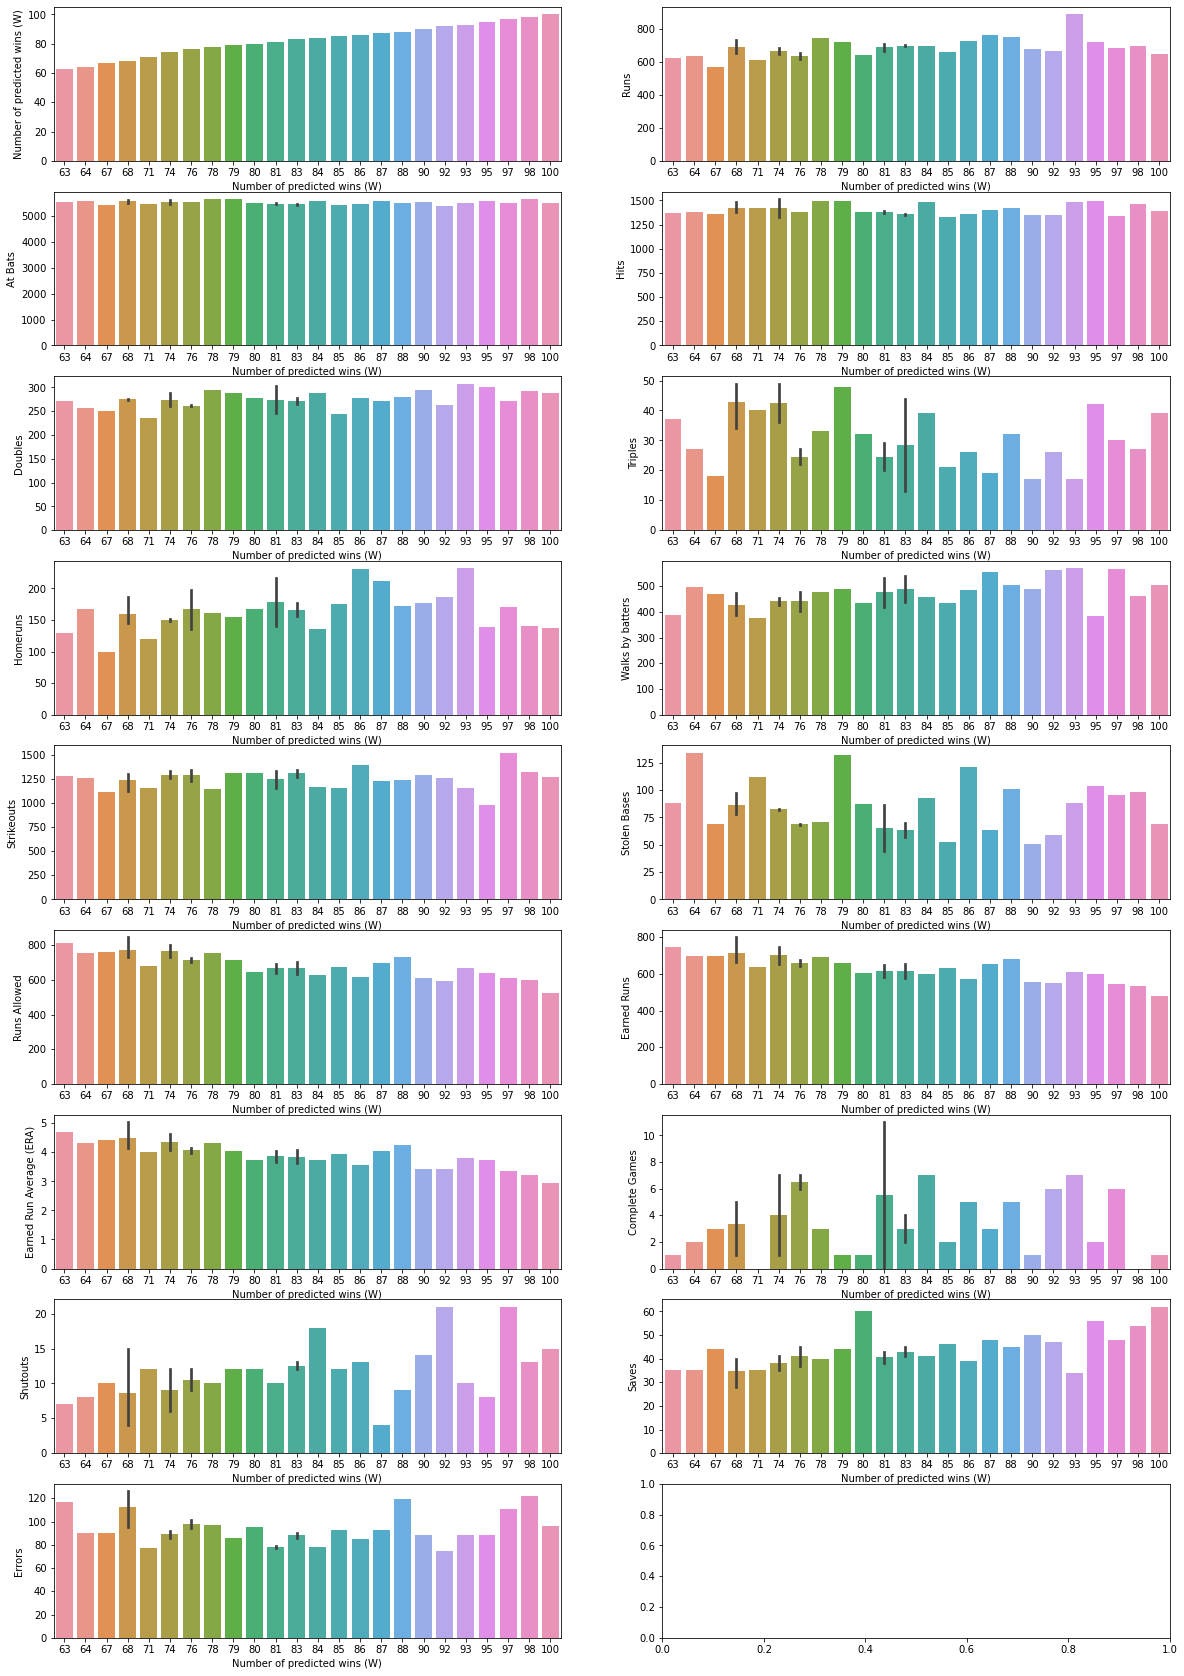

In [293]:
# Lets analyse the relation between target variable and other variables.
fig,ax= plt.subplots(ncols=2,nrows=9,figsize=(20,30))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != 'type':
        sns.barplot(x='Number of predicted wins (W)', y=col , data=df, ax=ax[index])
        index+=1

<AxesSubplot:>

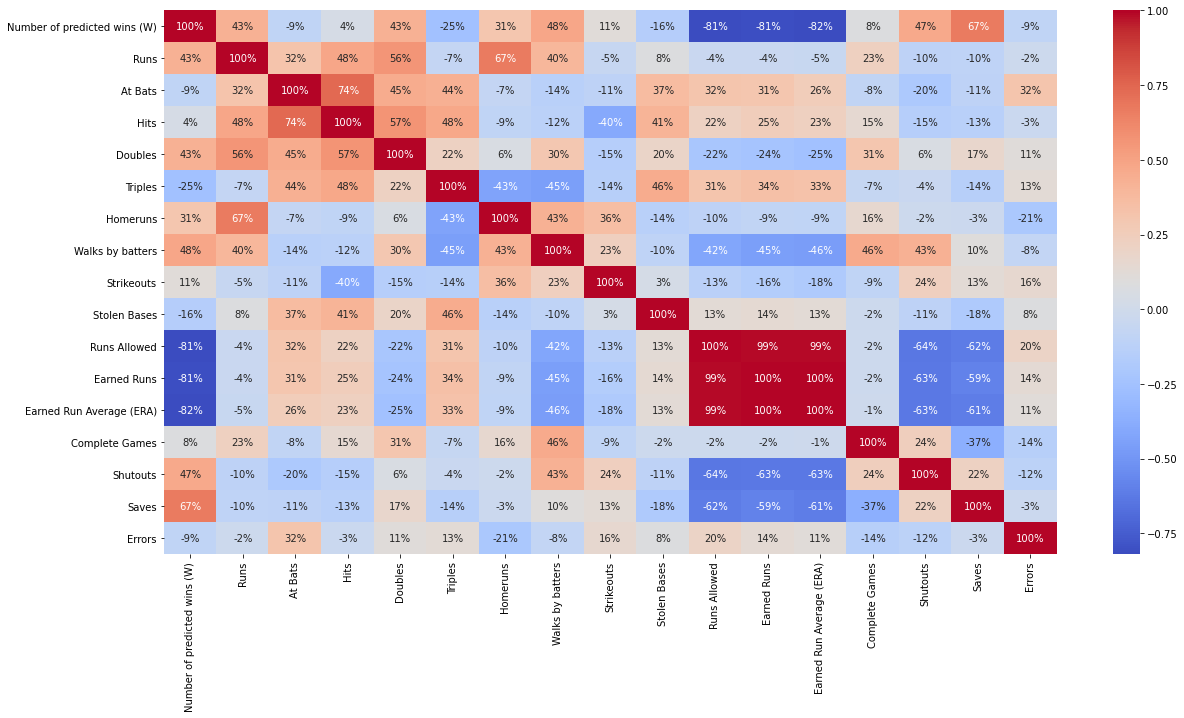

In [294]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', fmt='.0%')

***OBSERVATIONS:***  
1. we can see correlation for majority of the attributes with target variable.  
2. Some are having positive and others havig negative correlation as well.  
3. Variables like Atbats, Hits, Doubles, Homeruns, Shutouts and saves are positively correlated.
4. Others like Runs allowed, ERA are highly negatively correlated.

### TRAIN TEST SPLIT

In [295]:
#Separating independent and dependent values
y=df['Number of predicted wins (W)']
x=df.drop('Number of predicted wins (W)',axis=1)

In [296]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2, random_state=42)

### MODELLING

**1. LINEAR REGRESSION**

In [297]:
lr= LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, predlr))
print('MSE:', metrics.mean_squared_error(y_test, predlr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predlr)))

MAE: 3.892999136999684
MSE: 27.94303250666688
RMSE: 5.2861169592307435


**2. RANDOM FOREST REGRESSOR**

In [298]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
pred=rfr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 6.389999999999998
MSE: 68.81596666666664
RMSE: 8.295538961795469


**3. DECISION TREE REGRESSOR**

In [299]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 7.666666666666667
MSE: 82.66666666666667
RMSE: 9.092121131323903


Linear Regressor is having lowest RMSE value

### SAVING THE BEST MODEL

In [300]:
import pickle
# save the model to disk
filename = 'best_model_lr.pkl'
pickle.dump(lr,open(filename,'wb'))
#Load the model from disk
loaded_model= pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([ 82.87055379, 101.01861025,  69.42504558,  93.71375515,
        91.5547615 ,  79.20277886])